# **Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Loading dataset and Assigning column


In [ ]:
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Class"]
url = "/content/drive/My Drive/datascience/data/pima-indians-diabetes.csv"
data = pd.read_csv(url, header=None, names=column_names)

# 2. Preprocessing the data

In [ ]:
X = data.drop("Class", axis=1)
y = data["Class"]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Visualizing the dataset

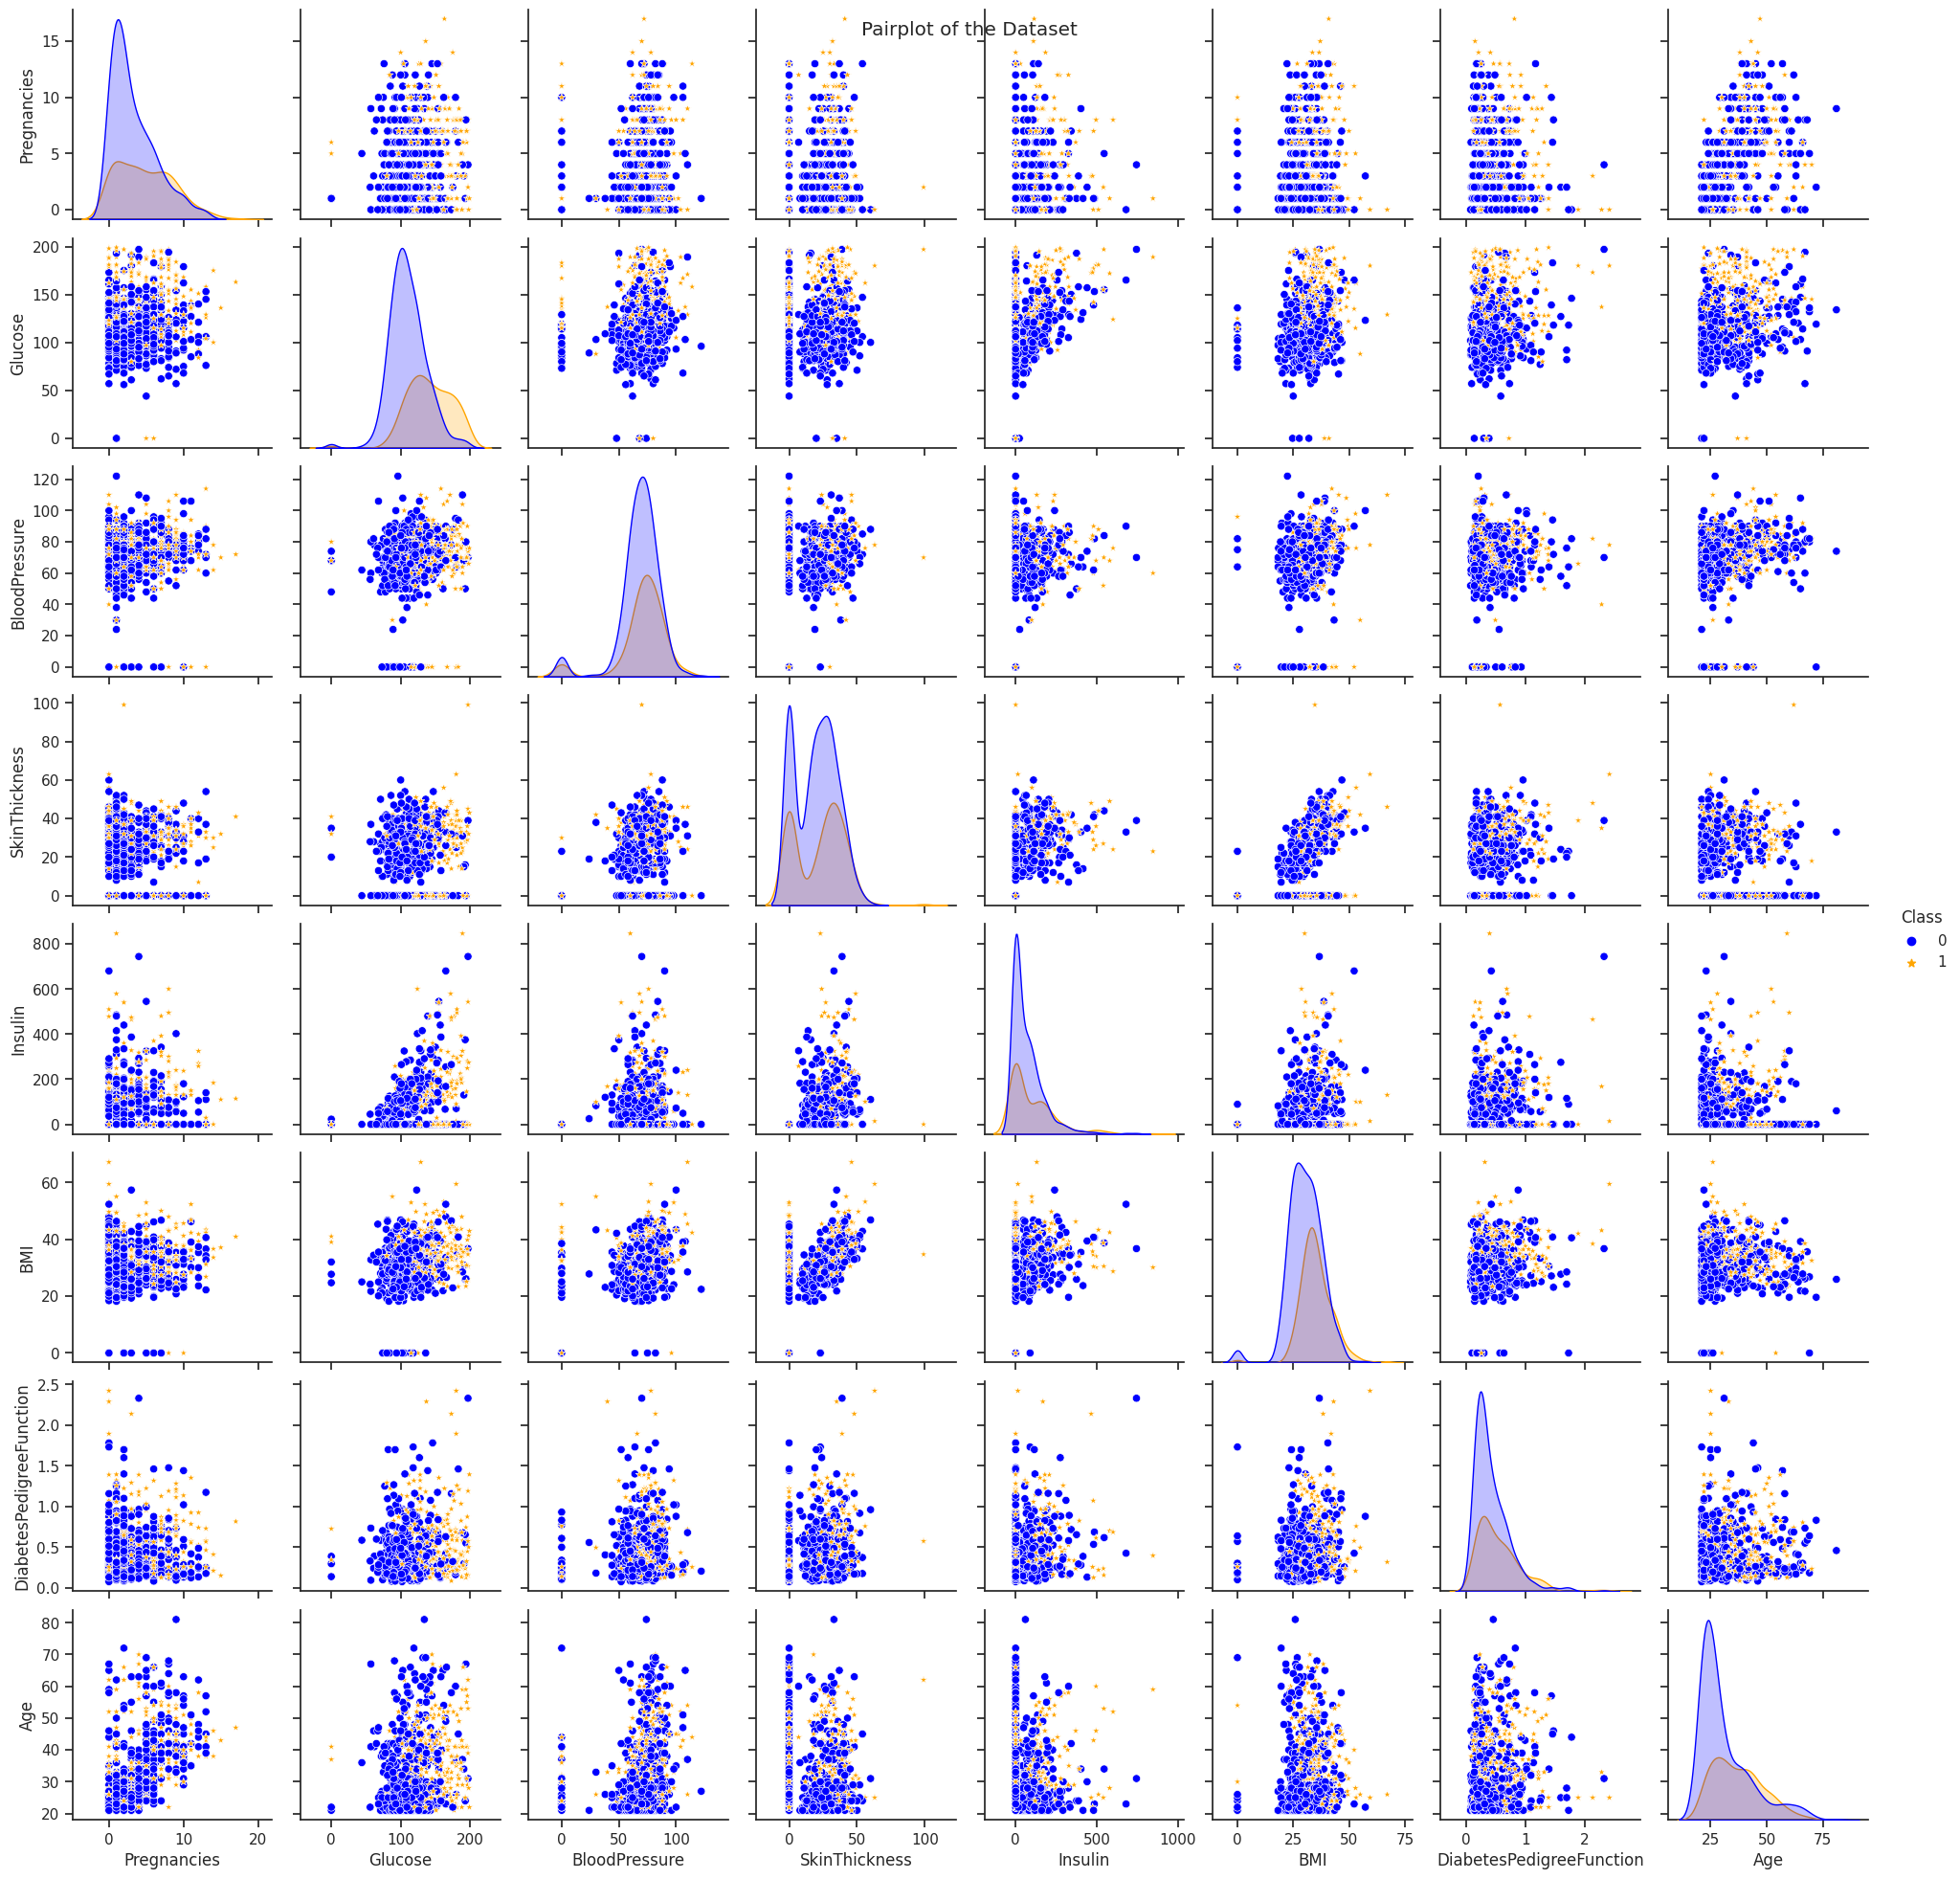

In [ ]:
sns.set(style="ticks")
sns.pairplot(data, hue="Class", markers=["o", "*"], palette={0: 'blue', 1: 'orange'})
plt.suptitle("Pairplot of the Dataset")
plt.show()

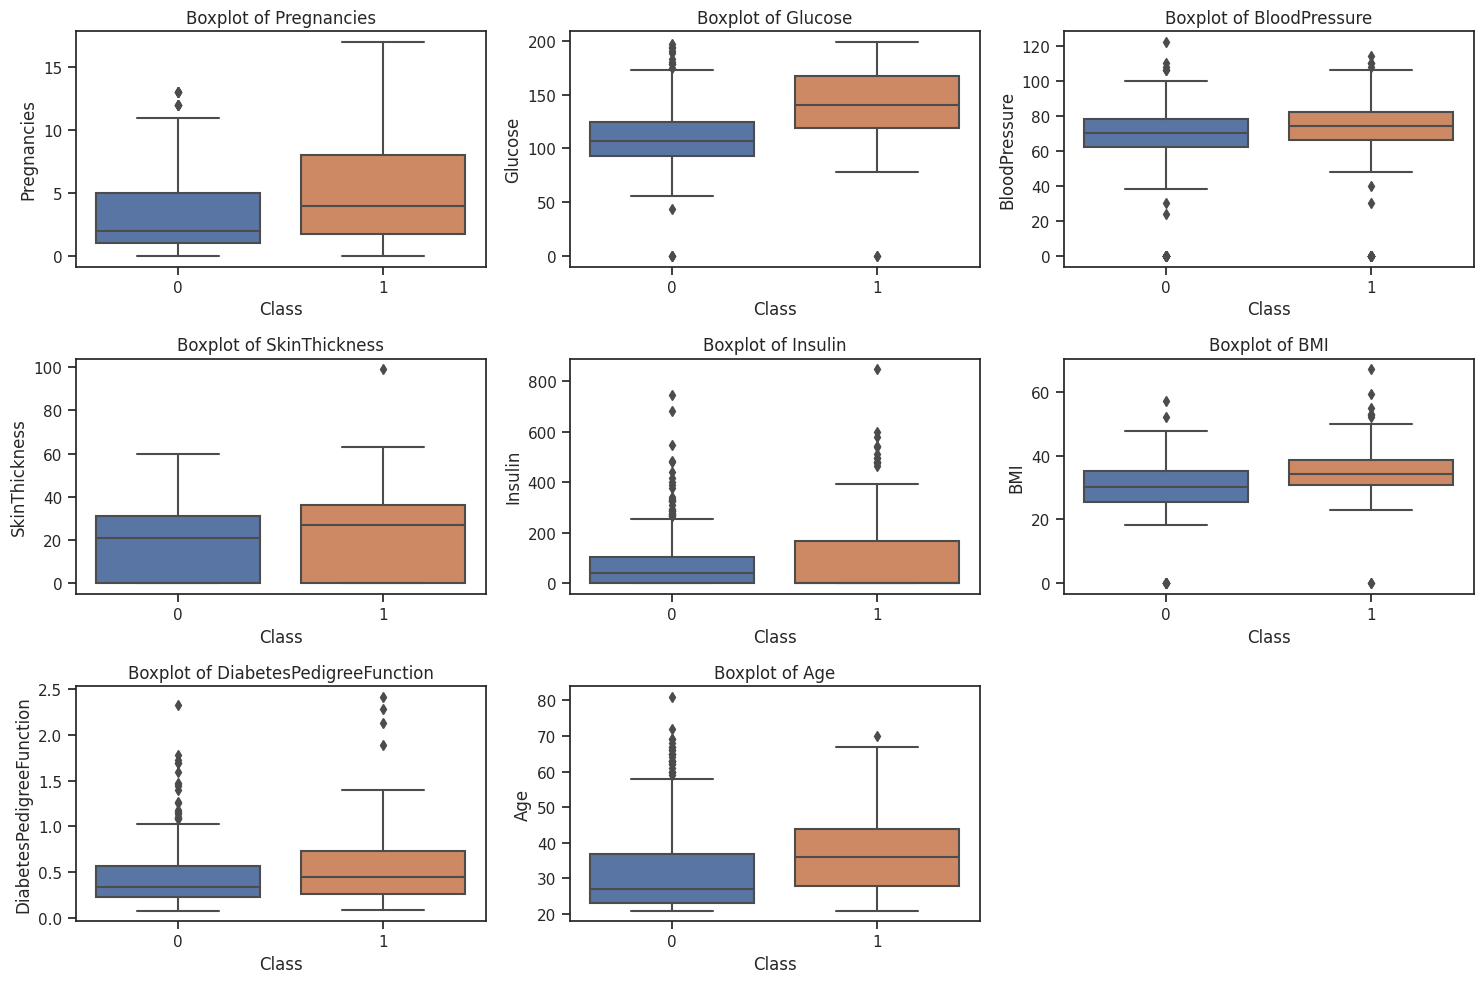

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x="Class", y=column, data=data)
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

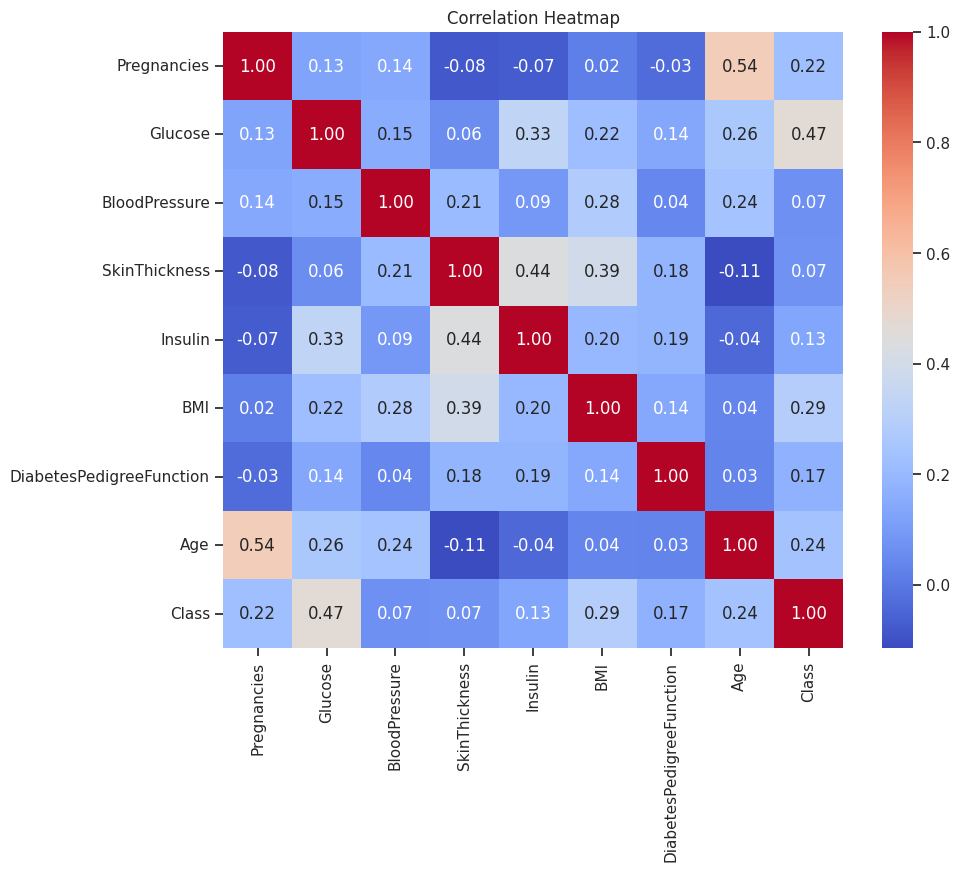

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. Spliting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# 4. Applying models

In [ ]:
# Initialize a dictionary to store accuracy scores
accuracy_scores = {}

In [ ]:
# Initialize dictionaries to store confusion matrices and classification reports
conf_matrices = {}
class_reports = {}

In [ ]:
# Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
accuracy_scores["Linear Discriminant Analysis"] = accuracy_score(y_test, lda_model.predict(X_test))
conf_matrices["Linear Discriminant Analysis"] = confusion_matrix(y_test, lda_model.predict(X_test))
class_reports["Linear Discriminant Analysis"] = classification_report(y_test, lda_model.predict(X_test))

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
accuracy_scores["Naive Bayes"] = accuracy_score(y_test, nb_model.predict(X_test))
conf_matrices["Naive Bayes"] = confusion_matrix(y_test, nb_model.predict(X_test))
class_reports["Naive Bayes"] = classification_report(y_test, nb_model.predict(X_test))

In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
accuracy_scores["K-Nearest Neighbors"] = accuracy_score(y_test, knn_model.predict(X_test))
conf_matrices["K-Nearest Neighbors"] = confusion_matrix(y_test, knn_model.predict(X_test))
class_reports["K-Nearest Neighbors"] = classification_report(y_test, knn_model.predict(X_test))

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
accuracy_scores["Decision Tree"] = accuracy_score(y_test, dt_model.predict(X_test))
conf_matrices["Decision Tree"] = confusion_matrix(y_test, dt_model.predict(X_test))
class_reports["Decision Tree"] = classification_report(y_test, dt_model.predict(X_test))

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_scores["Logistic Regression"] = accuracy_score(y_test, lr_model.predict(X_test))
conf_matrices["Logistic Regression"] = confusion_matrix(y_test, lr_model.predict(X_test))
class_reports["Logistic Regression"] = classification_report(y_test, lr_model.predict(X_test))

# Showing performance matrics

In [ ]:
# Print accuracy scores
print("\nAccuracy Scores:")
for model, accuracy in accuracy_scores.items():
    print(f"{model}: {accuracy:.2f}")


Accuracy Scores:
Linear Discriminant Analysis: 0.73
Naive Bayes: 0.74
K-Nearest Neighbors: 0.69
Decision Tree: 0.72
Logistic Regression: 0.74


In [ ]:
# Print confusion matrices
print("\nConfusion Matrices:")
for model, conf_matrix in conf_matrices.items():
    print(f"{model}:\n{conf_matrix}")


Confusion Matrices:
Linear Discriminant Analysis:
[[120  31]
 [ 31  49]]
Naive Bayes:
[[119  32]
 [ 27  53]]
K-Nearest Neighbors:
[[119  32]
 [ 39  41]]
Decision Tree:
[[110  41]
 [ 23  57]]
Logistic Regression:
[[120  31]
 [ 30  50]]


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

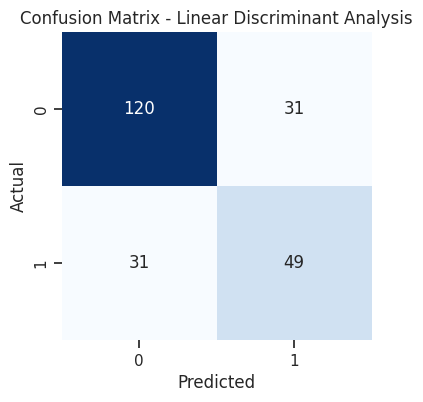

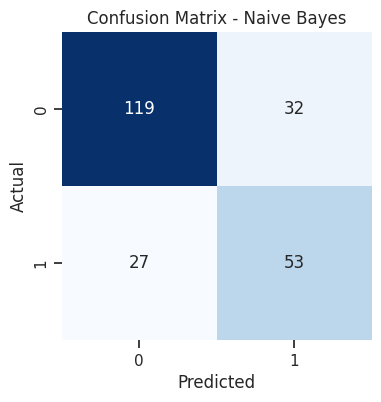

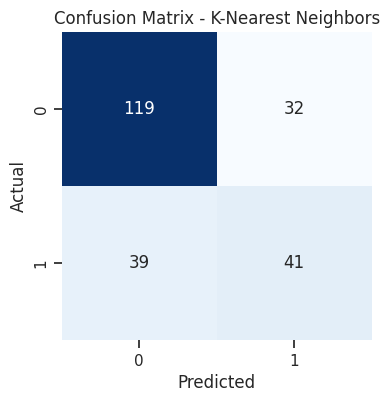

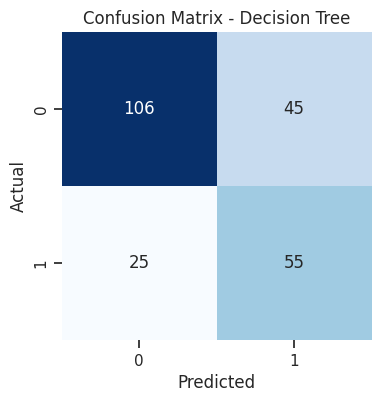

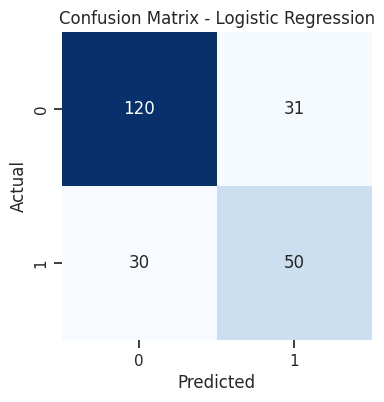

In [ ]:
# Loop through modelels to plot confusion matrix for each
for model_name, model in [('Linear Discriminant Analysis', lda_model),
                          ('Naive Bayes', nb_model),
                          ('K-Nearest Neighbors', knn_model),
                          ('Decision Tree', dt_model),
                          ('Logistic Regression', lr_model)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix - {model_name}")

In [ ]:
# Print classification reports
print("\nClassification Reports:")
for model, class_report in class_reports.items():
    print(f"{model}:\n{class_report}")


Classification Reports:
Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.61      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

Naive Bayes:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      

# 5. Determining which Algo performs best

In [ ]:
best_model_original = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nThe best-performing algorithm for the original data is: {best_model_original} with an accuracy of {accuracy_scores[best_model_original]:.2f}")


The best-performing algorithm for the original data is: Naive Bayes with an accuracy of 0.74


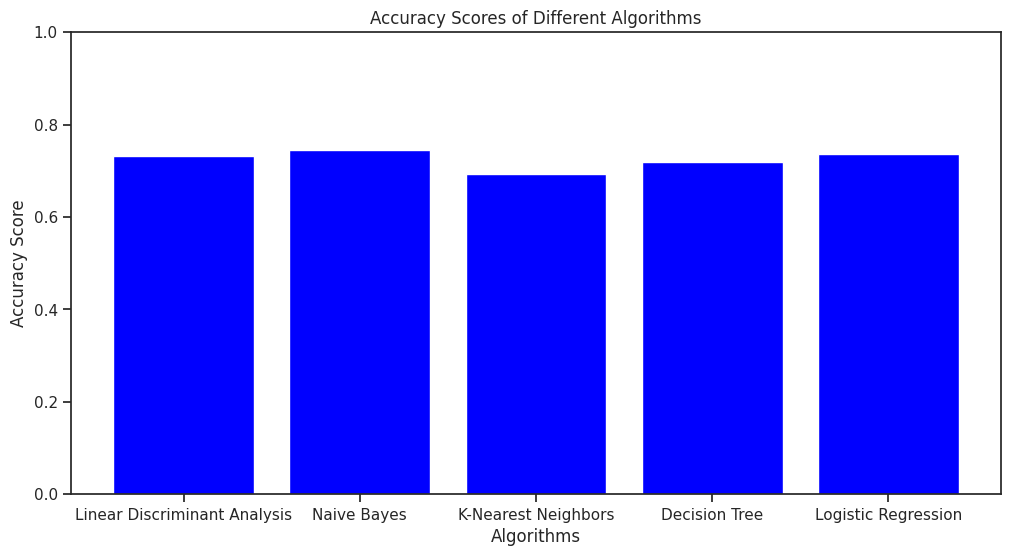

In [ ]:
# Create a bar graph to compare accuracy scores
plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Algorithms')
plt.ylim(0, 1.0)
plt.show()

# 6. Downsampling the dataset

In [ ]:
majority_class = data[data["Class"] == 0]
minority_class = data[data["Class"] == 1]

majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

downsampled_df = pd.concat([majority_downsampled, minority_class])

X_downsampled = downsampled_df.drop("Class", axis=1)
y_downsampled = downsampled_df["Class"]

X_train_downsampled, X_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(
    X_downsampled, y_downsampled, test_size=0.3, random_state=42
)

# Applying Models

In [ ]:
# Initialize a dictionary to store accuracy scores for downsampled data
accuracy_scores_downsampled = {}

In [ ]:
# Initialize dictionaries to store confusion matrices and classification reports for downsampled data
conf_matrices_downsampled = {}
class_reports_downsampled = {}

In [ ]:
# Linear Discriminant Analysis
lda_model.fit(X_train_downsampled, y_train_downsampled)
accuracy_scores_downsampled["Linear Discriminant Analysis"] = accuracy_score(y_test_downsampled, lda_model.predict(X_test_downsampled))
conf_matrices_downsampled["Linear Discriminant Analysis"] = confusion_matrix(y_test_downsampled, lda_model.predict(X_test_downsampled))
class_reports_downsampled["Linear Discriminant Analysis"] = classification_report(y_test_downsampled, lda_model.predict(X_test_downsampled))

In [ ]:
# Naive Bayes
nb_model.fit(X_train_downsampled, y_train_downsampled)
accuracy_scores_downsampled["Naive Bayes"] = accuracy_score(y_test_downsampled, nb_model.predict(X_test_downsampled))
conf_matrices_downsampled["Naive Bayes"] = confusion_matrix(y_test_downsampled, nb_model.predict(X_test_downsampled))
class_reports_downsampled["Naive Bayes"] = classification_report(y_test_downsampled, nb_model.predict(X_test_downsampled))

In [ ]:
# K-Nearest Neighbors
knn_model.fit(X_train_downsampled, y_train_downsampled)
accuracy_scores_downsampled["K-Nearest Neighbors"] = accuracy_score(y_test_downsampled, knn_model.predict(X_test_downsampled))
conf_matrices_downsampled["K-Nearest Neighbors"] = confusion_matrix(y_test_downsampled, knn_model.predict(X_test_downsampled))
class_reports_downsampled["K-Nearest Neighbors"] = classification_report(y_test_downsampled, knn_model.predict(X_test_downsampled))

In [ ]:
# Decision Tree
dt_model.fit(X_train_downsampled, y_train_downsampled)
accuracy_scores_downsampled["Decision Tree"] = accuracy_score(y_test_downsampled, dt_model.predict(X_test_downsampled))
conf_matrices_downsampled["Decision Tree"] = confusion_matrix(y_test_downsampled, dt_model.predict(X_test_downsampled))
class_reports_downsampled["Decision Tree"] = classification_report(y_test_downsampled, dt_model.predict(X_test_downsampled))


In [ ]:
# Logistic Regression
lr_model.fit(X_train_downsampled, y_train_downsampled)
accuracy_scores_downsampled["Logistic Regression"] = accuracy_score(y_test_downsampled, lr_model.predict(X_test_downsampled))
conf_matrices_downsampled["Logistic Regression"] = confusion_matrix(y_test_downsampled, lr_model.predict(X_test_downsampled))
class_reports_downsampled["Logistic Regression"] = classification_report(y_test_downsampled, lr_model.predict(X_test_downsampled))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Showing performance metrics

In [ ]:
# Print accuracy scores for downsampled data
print("\nAccuracy Scores (Downsampled Data):")
for model, accuracy in accuracy_scores_downsampled.items():
    print(f"{model}: {accuracy:.2f}")



Accuracy Scores (Downsampled Data):
Linear Discriminant Analysis: 0.78
Naive Bayes: 0.73
K-Nearest Neighbors: 0.71
Decision Tree: 0.68
Logistic Regression: 0.78


In [ ]:
# Print confusion matrices for downsampled data
print("\nConfusion Matrices (Downsampled Data):")
for model, conf_matrix in conf_matrices_downsampled.items():
    print(f"{model}:\n{conf_matrix}")


Confusion Matrices (Downsampled Data):
Linear Discriminant Analysis:
[[64 12]
 [24 61]]
Naive Bayes:
[[63 13]
 [30 55]]
K-Nearest Neighbors:
[[59 17]
 [29 56]]
Decision Tree:
[[57 19]
 [33 52]]
Logistic Regression:
[[63 13]
 [23 62]]


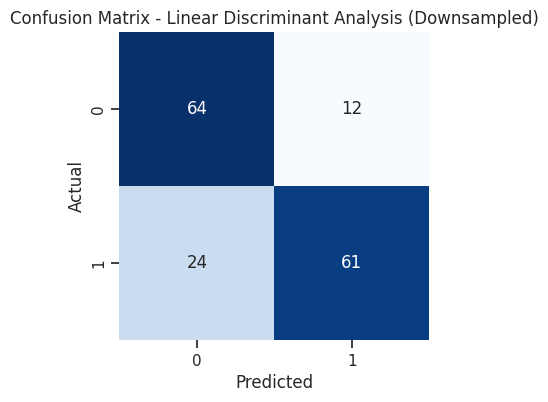

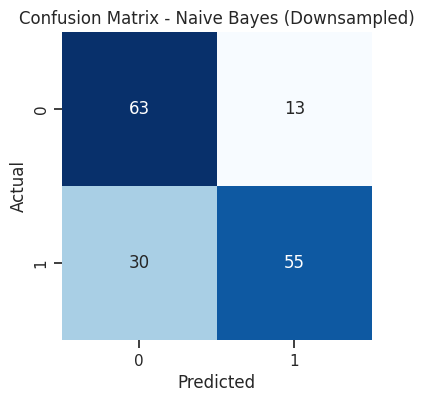

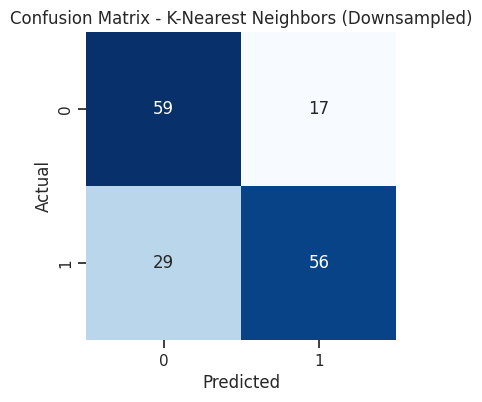

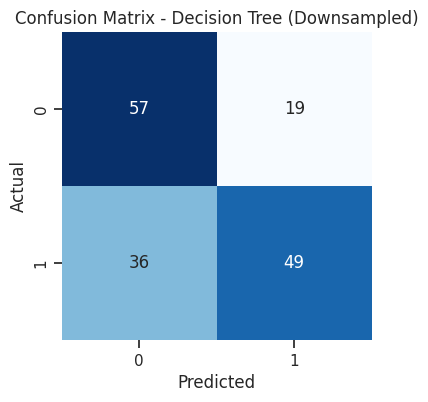

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


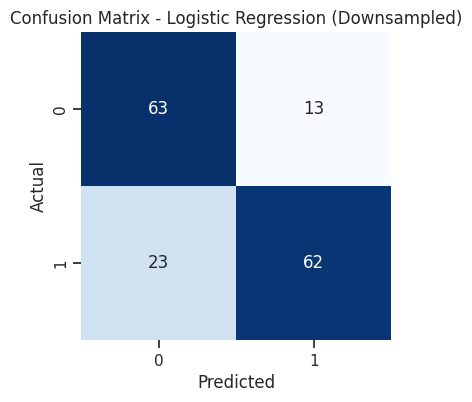

In [ ]:
# Loop through models to plot confusion matrix for each using downsampled data
for model_name, model in [('Linear Discriminant Analysis', lda_model),
                          ('Naive Bayes', nb_model),
                          ('K-Nearest Neighbors', knn_model),
                          ('Decision Tree', dt_model),
                          ('Logistic Regression', lr_model)]:
    model.fit(X_train_downsampled, y_train_downsampled)  # Use downsampled data
    y_pred_downsampled = model.predict(X_test_downsampled)

    # Plot confusion matrix for downsampled data
    plot_confusion_matrix(y_test_downsampled, y_pred_downsampled, title=f"Confusion Matrix - {model_name} (Downsampled)")


In [ ]:
# Print classification reports for downsampled data
print("\nClassification Reports (Downsampled Data):")
for model, class_report in class_reports_downsampled.items():
    print(f"{model}:\n{class_report}")


Classification Reports (Downsampled Data):
Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        76
           1       0.84      0.72      0.77        85

    accuracy                           0.78       161
   macro avg       0.78      0.78      0.78       161
weighted avg       0.78      0.78      0.78       161

Naive Bayes:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        76
           1       0.81      0.65      0.72        85

    accuracy                           0.73       161
   macro avg       0.74      0.74      0.73       161
weighted avg       0.75      0.73      0.73       161

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        76
           1       0.77      0.66      0.71        85

    accuracy                           0.71       161
   macro avg       0

# Determining which Algo performs best

In [ ]:
best_model_downsampled = max(accuracy_scores_downsampled, key=accuracy_scores_downsampled.get)
print(f"\nThe best-performing algorithm for the downsampled data is: {best_model_downsampled} with an accuracy of {accuracy_scores_downsampled[best_model_downsampled]:.2f}")


The best-performing algorithm for the downsampled data is: Linear Discriminant Analysis with an accuracy of 0.78


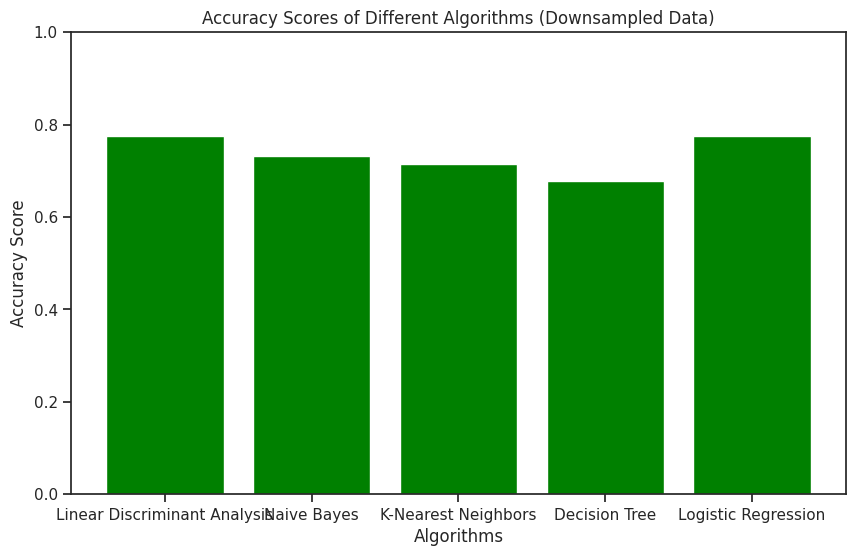

In [ ]:
# Create a bar graph to compare accuracy scores for downsampled data
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores_downsampled.keys(), accuracy_scores_downsampled.values(), color='green')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Algorithms (Downsampled Data)')
plt.ylim(0, 1.0)
plt.show()